# Projet Machine Learning : Notebook Python

Nous voulons étudier le jeu de données "Global Data on Sustainable Energy" (2000-2020) issu du site KAGGLE dans l'objectif de prédire la valeur du C02.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Analyse exploratoire des données

Pour ce faire nous commençons par effectuer une analyse exploratoire des données afin de nous familiariser avec celles-ci et de les préparer aux phases de modélisation pour en tirer de nouvelles conclusions.

1. Commencez par vérifier la nature des différentes variables et leur encodage. Convertissez la variable Year en une variable qualitative. N.B. Curieusement, la variable Density (P/Km2) n’est pas considérée comme une variable numérique. Convertissez-là en une variable numérique en prenant soin dene pas transformer les nombre décimaux en NA.

Nous commençons par importer le dataframe sur le notebook puis nous l'affichons afin d'avoir un aperçu des données : le nom des colonnes, la nature des variables, ...

In [2]:
#Importation du dataframe 
df = pd.read_csv('global-data-on-sustainable-energy (1).csv')

#Aperçu des données des 5 premières lignes 
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000.0,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001.0,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002.0,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003.0,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004.0,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [3]:
print("----Variable Year----")
df["Year"]=pd.Categorical(df["Year"],ordered=False)
print(df['Year'].describe(),'\n')

print("----Variable Entity----")
df["Entity"]=pd.Categorical(df["Entity"],ordered=False)
print(df['Entity'].describe(),'\n')

print("----Variable Density(P/Km2)----")
df["Density(P/Km2)"] = df["Density(P/Km2)"].apply(lambda x : float(x.replace(',','')) if type(x)==str else x)
print(df['Density(P/Km2)'].describe())

----Variable Year----
count     3544.0
unique      21.0
top       2020.0
freq       170.0
Name: Year, dtype: float64 

----Variable Entity----
count            3649
unique            276
top       Afghanistan
freq               21
Name: Entity, dtype: object 

----Variable Density(P/Km2)----
count    3543.000000
mean      141.030483
std       169.221081
min         2.000000
25%        30.000000
50%        83.000000
75%       203.000000
max      1281.000000
Name: Density(P/Km2), dtype: float64


2. Déterminez le taux de valeurs manquantes pour chaque variable.

On affiche ici la proportion de valeurs manquantes pour chacune des variables :

Entity                                                              0.000000
Year                                                                0.028775
Access to electricity (% of population)                             0.031515
Access to clean fuels for cooking                                   0.075089
Renewable-electricity-generating-capacity-per-capita                0.278158
Financial flows to developing countries (US $)                      0.580981
Renewable energy share in the total final energy consumption (%)    0.080570
Electricity from fossil fuels (TWh)                                 0.034530
Electricity from nuclear (TWh)                                      0.063305
Electricity from renewables (TWh)                                   0.034530
Low-carbon electricity (% electricity)                              0.040285
Primary energy consumption per capita (kWh/person)                  0.028775
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.084133

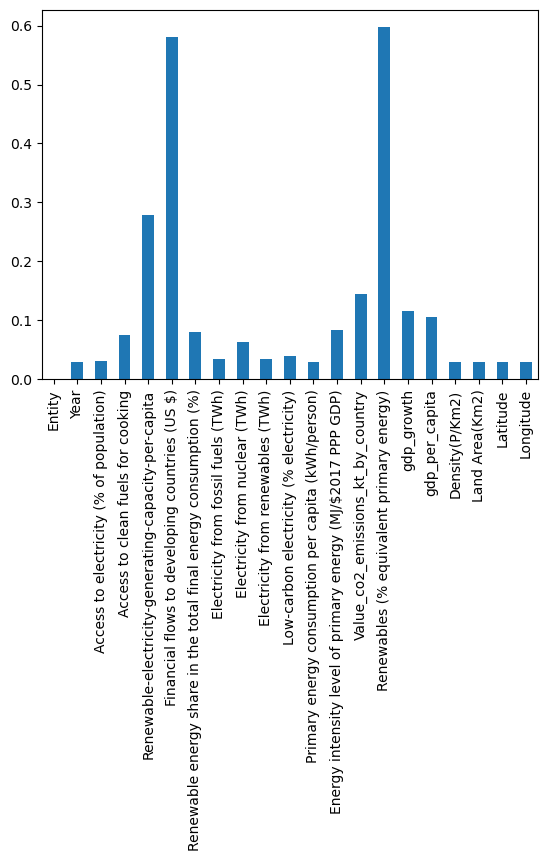

In [4]:
print(df.isna().sum()/len(df),'\n')

nrows = len(df)
missing_rates = 1-df.count(axis=0)/nrows

plt.figure()
missing_rates.plot.bar()
plt.show()

On remarque alors que les trois variables 'Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)' et 'Renewables (% equivalent primary energy)' comportent une très grande quantité de valeurs manquantes, nous décidons donc de les supprimer de notre étude pour ne pas fosser le résultat de nos futures prédictions. 

In [5]:
#Suppression des variables contenant trop de valeurs manquantes 
df = df.drop(labels=["Renewable-electricity-generating-capacity-per-capita",
                     "Financial flows to developing countries (US $)",
                     "Renewables (% equivalent primary energy)"],
             axis='columns')

#Affichage du nouveau dataframe sans les 3 variables précédentes
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000.0,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001.0,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002.0,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003.0,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004.0,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


3. Pour la suite de l’étude, vous allez créer un jeu de données comportant seulement les individus qui n’ont pas de valeur manquante. Il reste alors 2868 observations.

Nous modifions une nouvelle fois notre dataframe en supprimant maintenant toutes les lignes qui comportent au moins une valeur manquante.

In [6]:
df = df.dropna()
print("Le jeu de données contient désormais",len(df),"lignes, après avoir supprimé les lignes comportant des valeurs manquantes.")

Le jeu de données contient désormais 2768 lignes, après avoir supprimé les lignes comportant des valeurs manquantes.


4. Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations des variables quantitatives vous semblent-t-elles pertinentes ?

Après avoir bien formaté notre dataframe nous pouvons passer à l'analyse descriptive de nos données.
On commence par afficher les caractéristiques statistiques descriptives liées à nos données.

In [7]:
df.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03,2768.000000,2768.000000,2768.000000,2.768000e+03,2768.000000,2768.000000
mean,76.073921,61.529949,36.757973,78.706019,15.891102,27.555329,41.006385,24345.167562,5.468888,1.740413e+05,3.846607,12365.151752,127.760116,6.808566e+05,18.143711,11.037845
std,31.767362,39.256953,29.955577,380.954100,80.131992,109.449341,34.283580,34533.783236,3.590403,8.321897e+05,4.646305,18764.236801,136.769059,1.731288e+06,25.240660,65.568731
min,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.110120,1.030000,3.000000e+01,-36.658153,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,51.633116,21.700000,9.927500,0.280000,0.000000,0.120000,7.833861,2752.572175,3.350000,2.190000e+03,1.713263,1191.959749,30.000000,3.612500e+04,1.650801,-11.779889
50%,96.757080,79.725000,29.820000,2.970000,0.000000,1.930000,37.312574,11555.610500,4.465000,1.018000e+04,3.730610,4099.705847,81.000000,1.471810e+05,15.870032,17.873887
75%,100.000000,100.000000,61.965000,24.870000,0.000000,10.912500,68.643873,30163.321500,6.160000,6.008000e+04,5.900678,14104.523310,153.000000,5.053700e+05,40.069099,42.776031
max,100.000000,100.000000,96.040000,5098.220000,809.410000,2014.570000,100.000010,262585.700000,32.570000,1.070722e+07,63.379875,123514.196700,668.000000,9.984670e+06,64.963051,178.065032


Avec le tableau ci-dessus, on se rend compte que beaucoup de variables prennent des grandes plages de valeurs. Par exemple, la variable 'Primary energy consumption per capita (kWh/person)' prend des valeurs entre 105 et 262585, avec une moyenne de 26082. Cette grosse différence d'echelle au sein d'une même colonne nous met sur la piste d'une potentielle transformation logarithmique des données.

Ci-dessous, nous allons afficher les données ainsi que leurs transformations logarithmiques, afin de se rendre compte graphiquement pour quelles variables la transformation est pertinente.

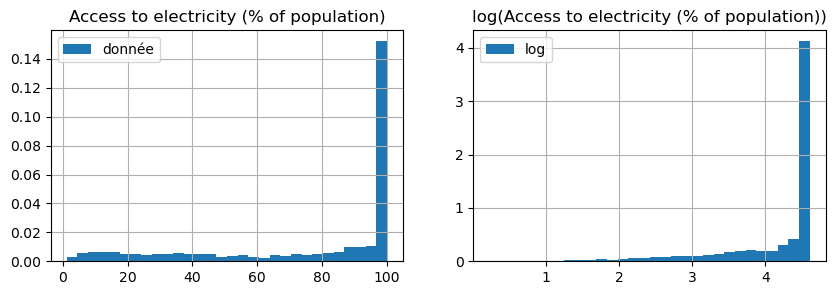

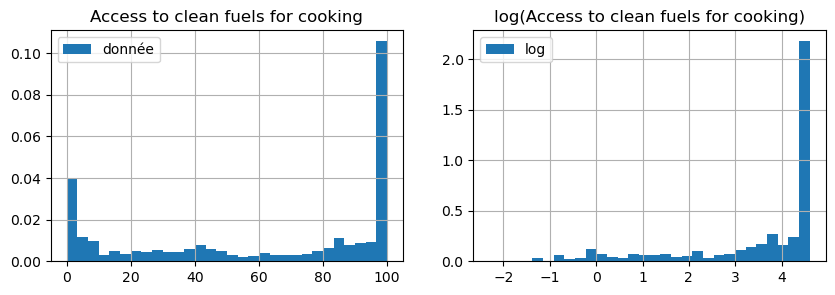

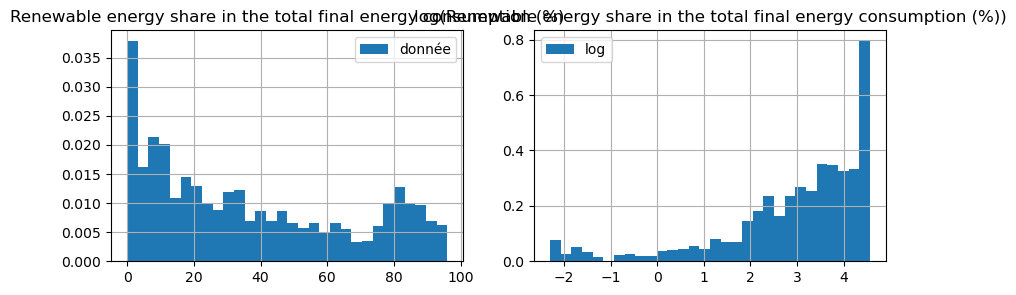

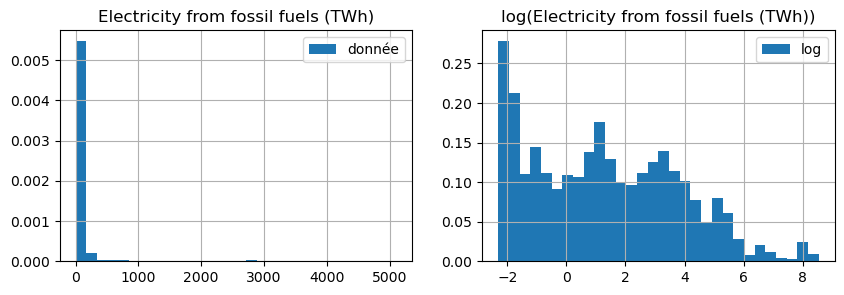

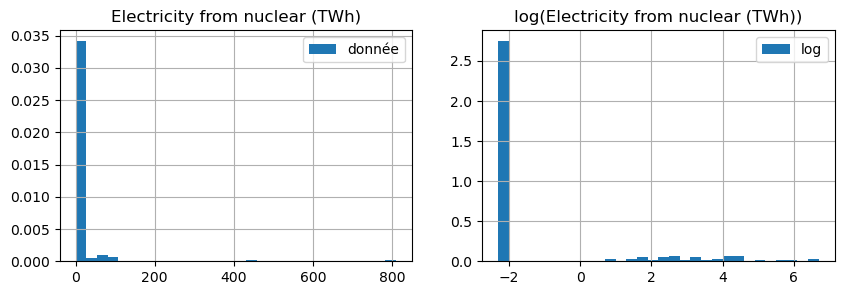

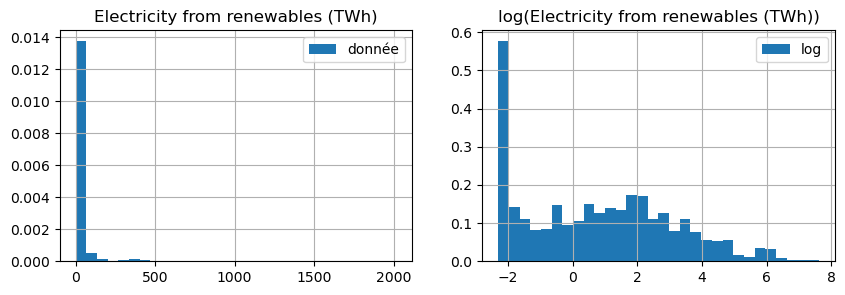

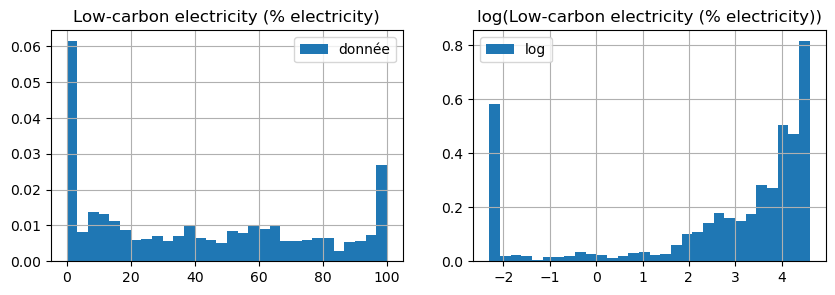

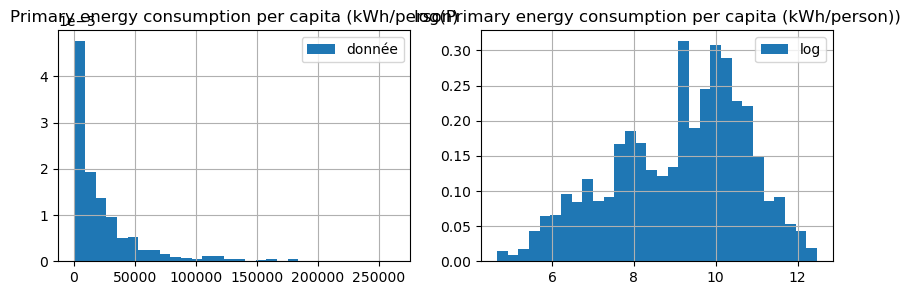

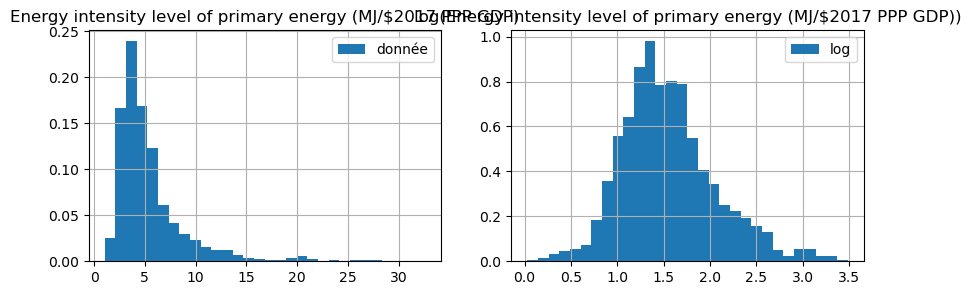

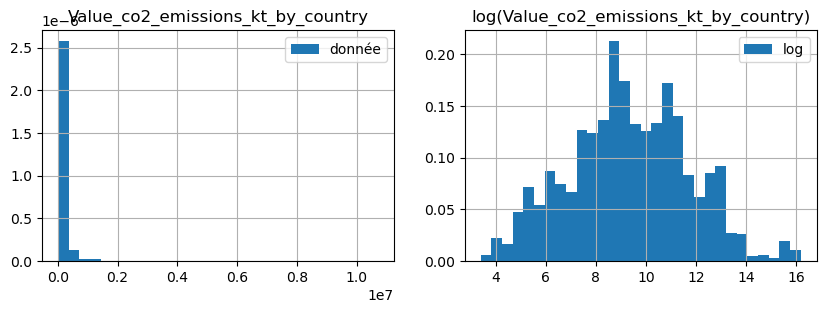

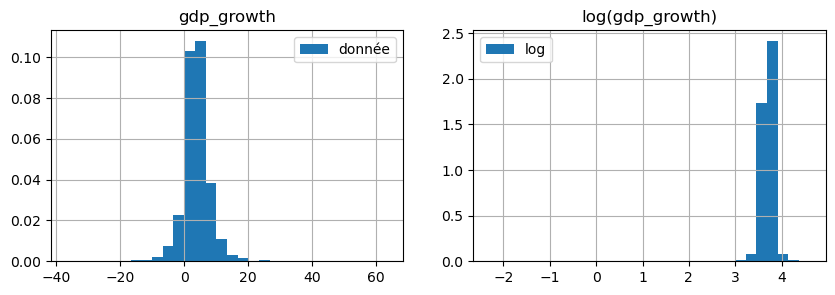

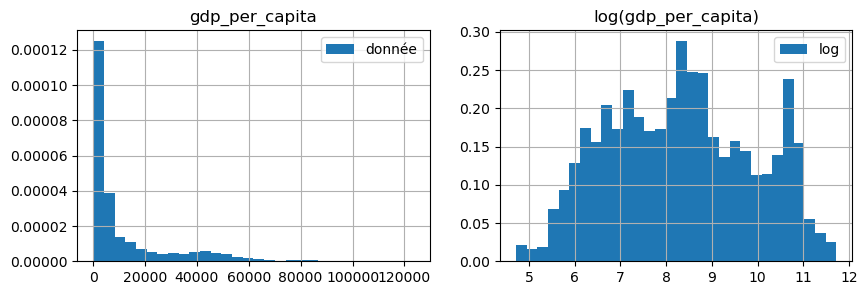

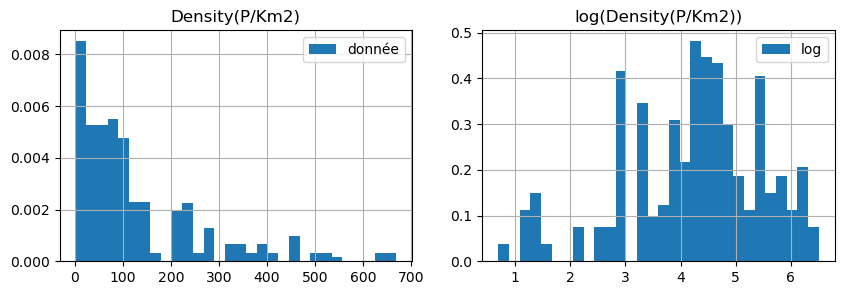

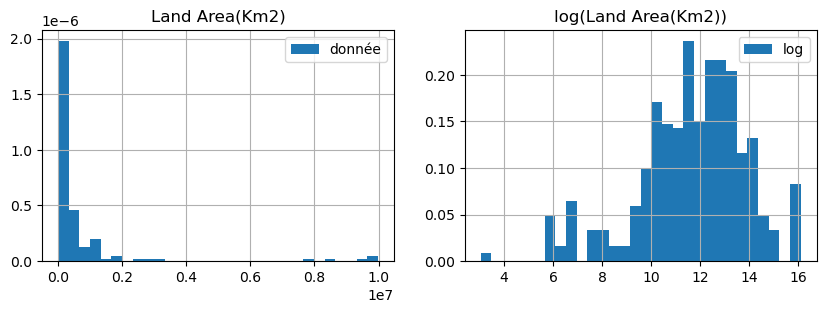

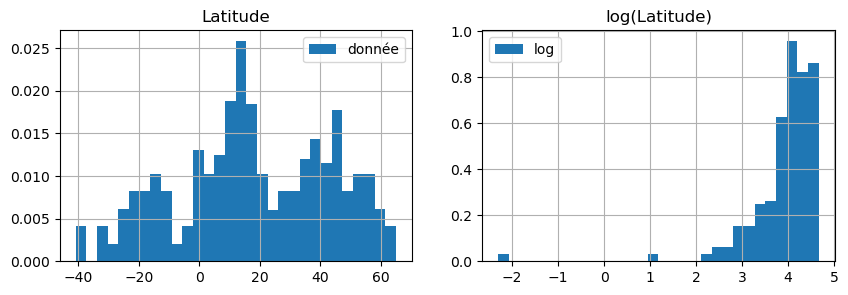

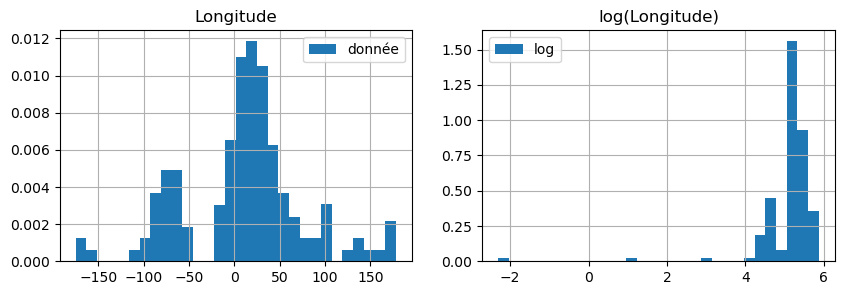

In [8]:
interesting_columns = [col for col in df.columns if col not in ['Entity', 'Year']]

nbins = 30

for column_to_test in interesting_columns :
    
    eps = (min(df[column_to_test]) <= 0) * (abs(min(df[column_to_test])) + 0.1)

    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1)
    df[column_to_test].hist(density=True,label='donnée',bins=nbins)
    plt.title(column_to_test)
    plt.legend()
    
    plt.subplot(1,2,2)
    np.log(df[column_to_test] + eps).hist(density=True,label='log',bins=nbins)
    plt.title('log(' + column_to_test + ')')
    plt.legend()
    
    plt.show()

Ci-dessus, nous affichons les données du dataframe ainsi que leurs transformations logarithmiques (en ajoutant un offset pour les données prenant des valeurs négatives ou nulles). On considère que la transfomation améliore nos données si la répartition de nos données transformées ressemble plus à une gaussienne. Ainsi, on peut dire que la transformation logarithmique est pertinente pour 6 colonnes que sont : 

- 'Primary energy consumption per capita (kWh/person)'
- 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
- 'Value_co2_emissions_kt_by_country'
- 'gdp_per_capita'
- 'Density(P/Km2)'
- 'Land Area(Km2)'. 

On décide de créer de nouvelles colonnes à notre dataframe pour sauvegarder nos transformations log. Par exemple pour la variable 'gdp_per_capita', nous avons la colonne d'origine et nous crééons 'log_gdp_per_capita' qui comporte le log de 'gdp_per_capita'.

In [9]:
#on sauvegarde les variables que l'on va transformer dans un vecteur
column_log = ['Primary energy consumption per capita (kWh/person)',
              'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
              'Value_co2_emissions_kt_by_country',
              'gdp_per_capita',
              'Density(P/Km2)',
              'Land Area(Km2)']

#on rajoute des colonnes avec les variables transformées en log
for column in column_log :
    df['log_'+column] = np.log(df[column])
    interesting_columns += ['log_' + column]

#Affichage du nouveau dataframe pour visualiser les nouvelles colonnes
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),...,Density(P/Km2),Land Area(Km2),Latitude,Longitude,log_Primary energy consumption per capita (kWh/person),log_Energy intensity level of primary energy (MJ/$2017 PPP GDP),log_Value_co2_emissions_kt_by_country,log_gdp_per_capita,log_Density(P/Km2),log_Land Area(Km2)
3,Afghanistan,2003.0,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,...,60.0,652230.0,33.93911,67.709953,5.437941,0.336472,7.106606,5.250617,4.094345,13.388153
4,Afghanistan,2004.0,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,...,60.0,652230.0,33.93911,67.709953,5.319253,0.182322,6.937314,5.353667,4.094345,13.388153
5,Afghanistan,2005.0,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,...,60.0,652230.0,33.93911,67.709953,5.529703,0.343590,7.346010,5.489067,4.094345,13.388153
6,Afghanistan,2006.0,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,...,60.0,652230.0,33.93911,67.709953,5.718411,0.405465,7.473069,5.574940,4.094345,13.388153
7,Afghanistan,2007.0,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,...,60.0,652230.0,33.93911,67.709953,5.870087,0.425268,7.478735,5.885251,4.094345,13.388153


5. Visualisez la grande hétérogénéité des émissions de CO2 entre les pays. Quels sont les 5 pays les plus émetteurs de CO2 ?

On s'intéresse désormais à la variable 'Value_co2_emissions_kt_by_country'. 

On commence par trier les valeurs des émissions pour chaque pays et on affiche un barplot des 50 pays les plus émetteurs. Cela nous permet de nous rendre compte de la grande hétérogéneité des émissions entre les pays. En effet, on voit qu'il y a 5 pays qui comportent une valeur d'émissions supérieure à 1.5e7, puis les valeurs des autres pays sont beaucoup plus faibles. 

On renvoie ensuite les valeurs des émissions de C02 pour les différents pays puis on affiche le barplot avec les 5 pays les plus émetteurs. 

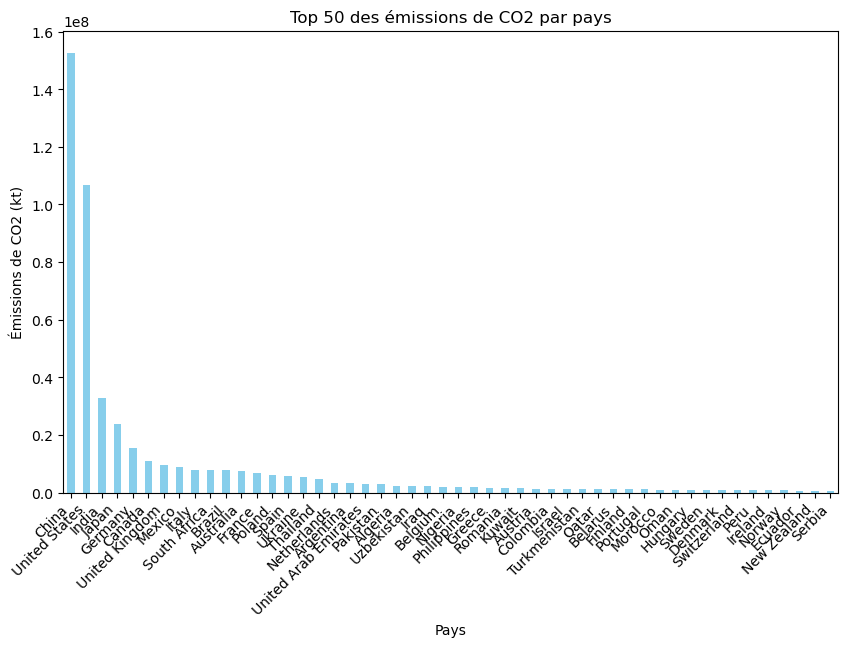

Entity
China                                                                                                                                1.527328e+08
United States                                                                                                                        1.065908e+08
India                                                                                                                                3.267958e+07
Japan                                                                                                                                2.367469e+07
Germany                                                                                                                              1.547289e+07
                                                                                                                                         ...     
Malta,2014,100,100,,,4.48,2.17,0,0.08,3.5555556,59933.56,2.01,2359.999895,,7.633538112,26754.26845,"1,38",316,35.9374

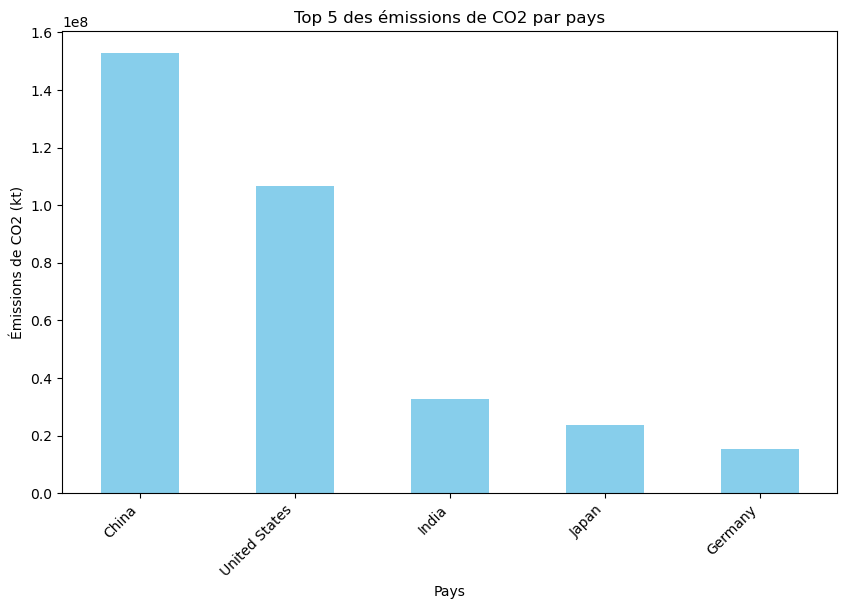

In [10]:
# Tri par ordre décroissant des valeurs des émissions par pays
emissions_par_pays = df.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().sort_values(ascending=False)

#Affichage en bar plot des 50 pays les plus émetteurs 
plt.figure(figsize=(10, 6))
emissions_par_pays.head(50).plot(kind='bar', color='skyblue')
plt.title('Top 50 des émissions de CO2 par pays')
plt.xlabel('Pays')
plt.ylabel('Émissions de CO2 (kt)')
plt.xticks(rotation=45, ha='right')
plt.show()

#Afichage des valeurs des émissions par pays triés par ordre décroissant
print(emissions_par_pays,"\n")

#Barplot des 5 pays les plus émetteurs
plt.figure(figsize=(10, 6))
emissions_par_pays.head(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 des émissions de CO2 par pays')
plt.xlabel('Pays')
plt.ylabel('Émissions de CO2 (kt)')
plt.xticks(rotation=45, ha='right')
plt.show()



6. Poursuivez avec une analyse descriptive multidimensionnelle. Utilisez des techniques de visualisation: par exemple les nuages de points (scatterplot), des graphes des correlations... Analysez les dépendances entre les variables quantitatives.

Afin de poursuivre notre étude, on analyse le point de vue descriptif multidimensionnel, on commence par afficher la matrice de corrélation entre les différentes variables. 

Cet affichage nous permet de voir qu'il existe une corrélation très importante (proche de 1 : 0.99) entre la variable à prédire 'Value_co2_emissions_kt_by_country' et  'Electricity from fossil fuels (TWh)'. De plus, on peut aussi noter une corrélation conséquente entre ''Value_co2_emissions_kt_by_country' et 'Electricity from renewables (TWh)'. 

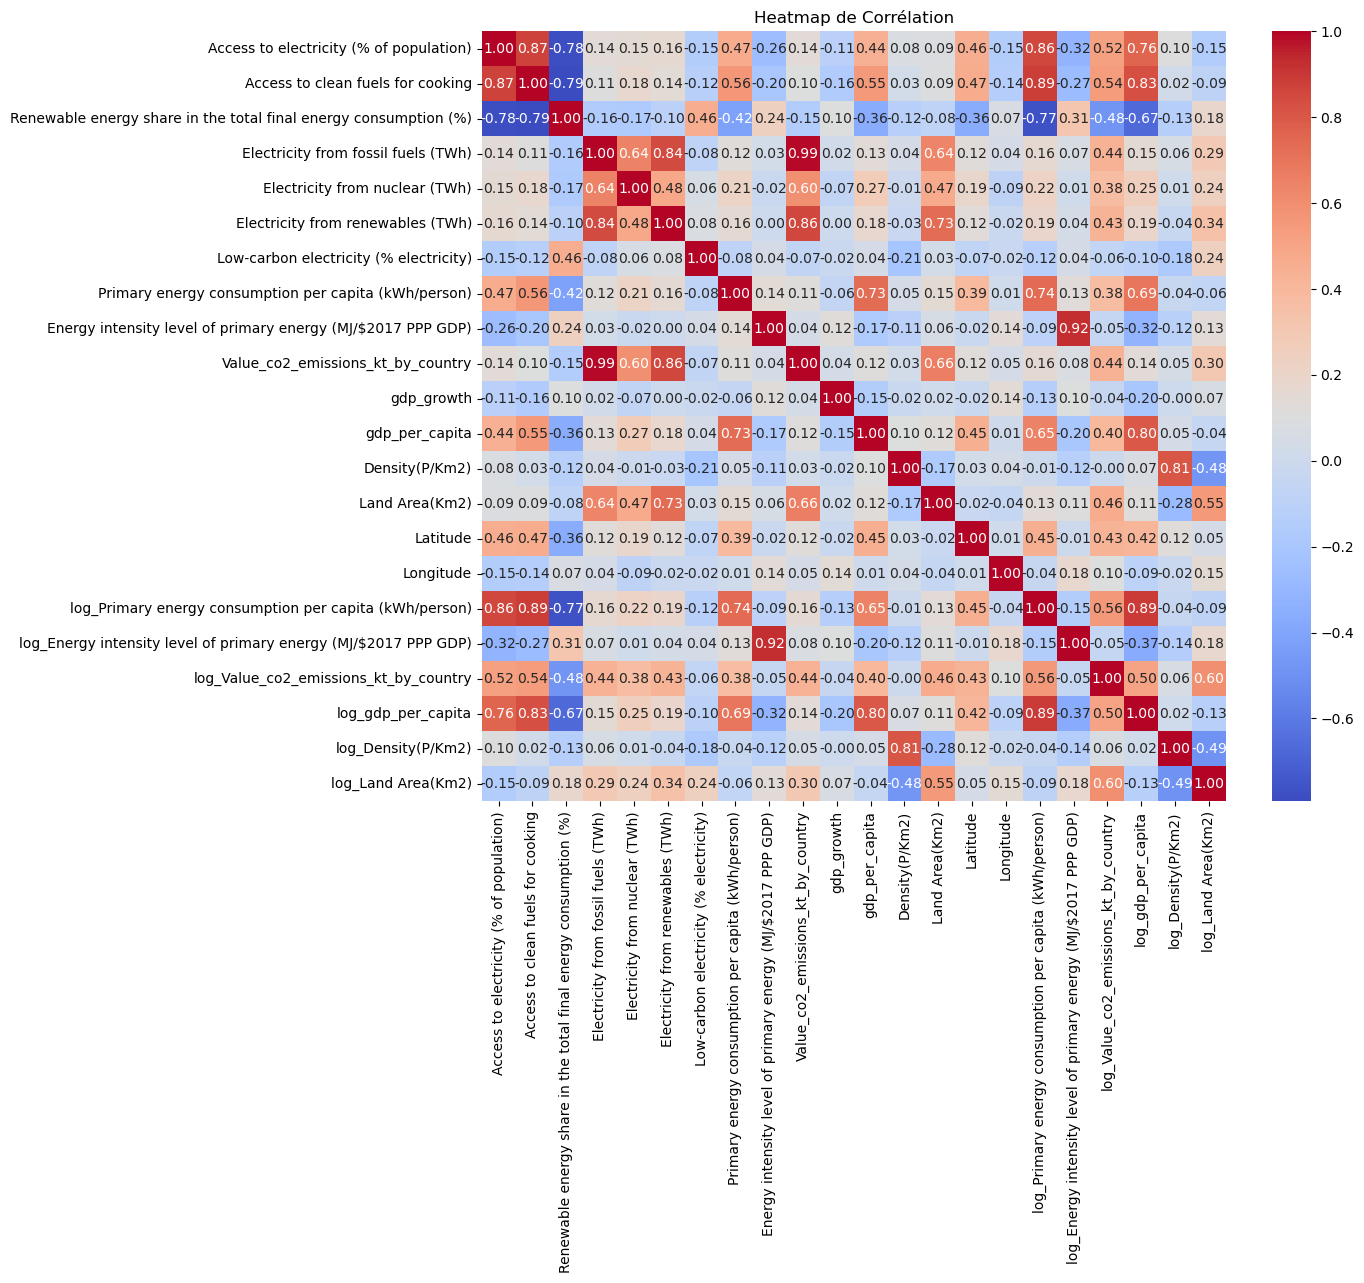

In [12]:
import seaborn as sns

#correlation_matrix = df.corr(numeric_only=True)
correlation_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Corrélation')
plt.show()

On affiche également le nuage point des différentes variables 
### ANALYSE?

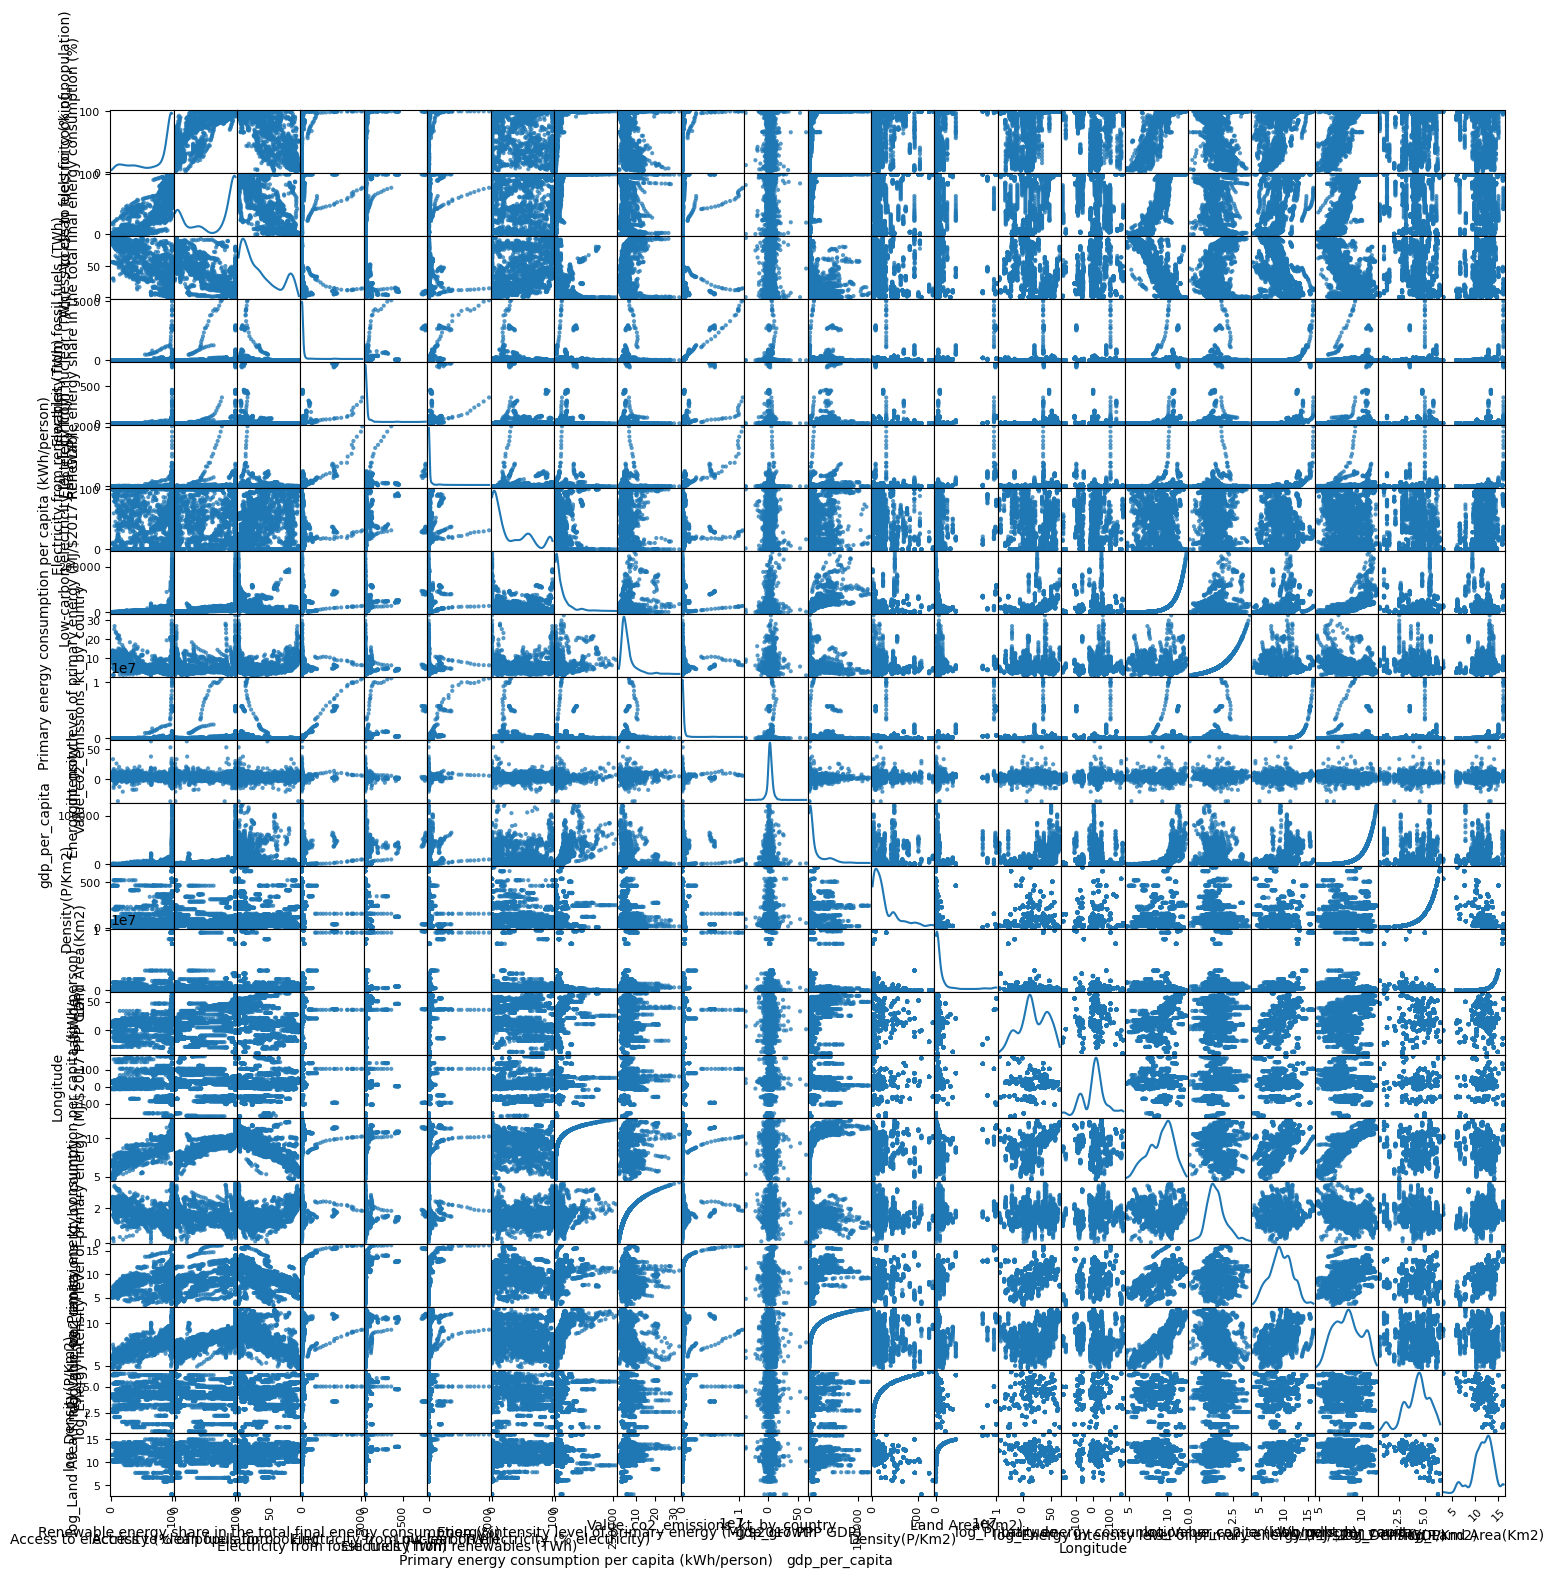

In [13]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix

scatter_matrix(df[interesting_columns], alpha=0.75, 
               figsize=(18, 18), diagonal='kde')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

7. Réalisez une analyse en composantes principales des variables quantitatives et interprétez les résultats.

Afin de simplifier la dimension de notre dataframe, on souhaite réaliser une Analyse en composantes principales (ACP). 

Pour cela, nous commençons par afficher les boxplots des variables quantitatives sur la même échelle, pour voir s'il est intéressant de standardiser nos données. En effet, si nos données ne sont pas exprimées dans la même échelle cela peut influencer l'importance qu'a une variable sur notre ACP. 

C'est le cas ici et les boxplots nous montrent bien cet écart d'échelle. Ainsi, on commence par standardiser nos données. 

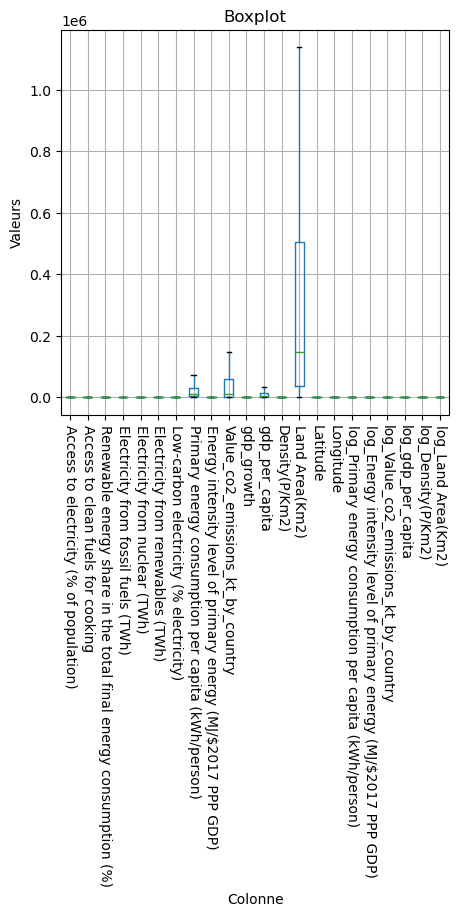

In [14]:
#Affichage en boxplot des variables qualitatives sur la meme échelle
plt.figure(figsize=(5,5))
df.boxplot(interesting_columns,showfliers=False)
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()

In [15]:
#Standardisation des données 
from sklearn.preprocessing import StandardScaler

colonnes_quantitatives = [col for col in df.columns if col not in ['Entity', 'Year']]

scaler = StandardScaler()
df_norm = scaler.fit_transform(df[colonnes_quantitatives])

# Convertision du tableau numpy obtenu en DataFrame
df_norm = pd.DataFrame(df_norm, columns=colonnes_quantitatives)

Suite à la standardisation des données, on réalise l'ACP. On commence par afficher la courbe de la Variance cumulée expliquée en fonction de la dimension de l'espace de l'ACP. On voit que plus il y a de composantes mieux la variance est expliquée. 

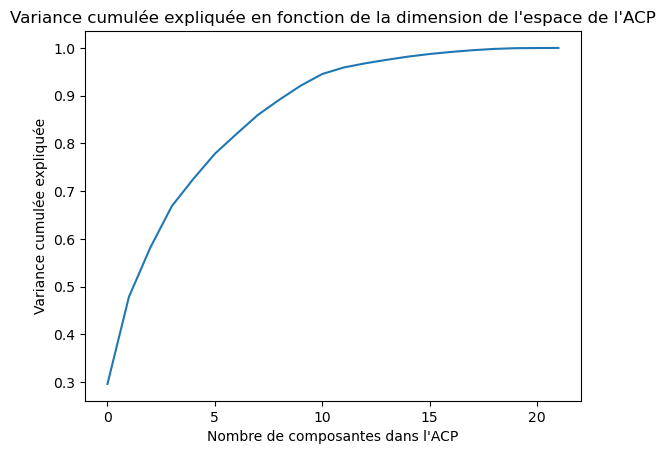

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
df_pca = pca.fit_transform(df_norm)


plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Variance cumulée expliquée en fonction de la dimension de l\'espace de l\'ACP')
plt.xlabel('Nombre de composantes dans l\'ACP')
plt.ylabel('Variance cumulée expliquée');

Ensuite, on utilise une fonction du package qui nous permet de savoir combien de composantes il nous faut garder afin d'estimer un certain pourcentage de la variance. Nous choisissons d'expliquer 95% de la variance ici. 

In [17]:
#Nombre de composantes nécessaires pour expliquer 95% de la variance
pca = PCA(0.95).fit(df_norm) 


#Affichae du nombre de composantes gardées pour l'ACP
pca.n_components_ 
print(f"on garde {pca.n_components_} composantes pour l'ACP")

on garde 12 composantes pour l'ACP


In [18]:
pca = PCA(n_components=pca.n_components_)

data_pca = pca.fit_transform(df_norm) #même chose que fit puis transform dans notre cas à nous

print(100*pca.explained_variance_ratio_)


print('--- ACP ---')
print('Dimension initiale :', df_norm.shape)
print('Dimension après projection:', df_pca.shape)

#Affichage des pourcentages de la variance expliquée pour chaque composante de l'ACP.
print('\n--- Variance expliquée ---')
print('Composante 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% de la variance totale')
print('Composante 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% de la variance totale')
print('Composante 3:', round(pca.explained_variance_[2],2), 'i.e.', round(100*pca.explained_variance_ratio_[2],2), '% de la variance totale')

[29.58465977 18.26090448 10.35248517  8.66337863  5.69533171  5.25857248
  4.12364393  4.00201559  3.19275091  2.96078635  2.43464025  1.3667024 ]
--- ACP ---
Dimension initiale : (2768, 22)
Dimension après projection: (2768, 22)

--- Variance expliquée ---
Composante 1: 6.51 i.e. 29.58 % de la variance totale
Composante 2: 4.02 i.e. 18.26 % de la variance totale
Composante 3: 2.28 i.e. 10.35 % de la variance totale


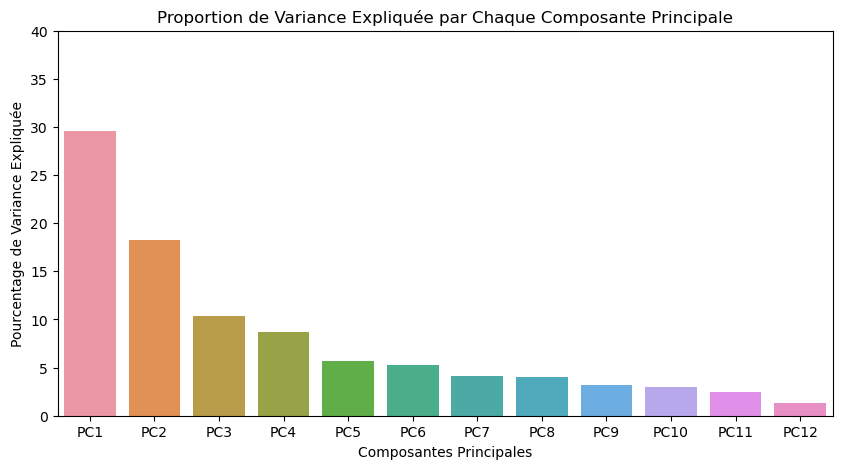

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 40)  # limiter l'axe y à la plage spécifiée
plt.show()

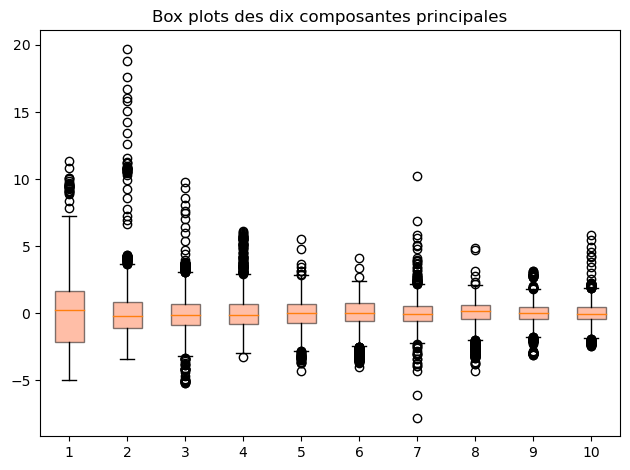

In [20]:
box = plt.boxplot(df_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots des dix composantes principales")
plt.tight_layout()
plt.show()

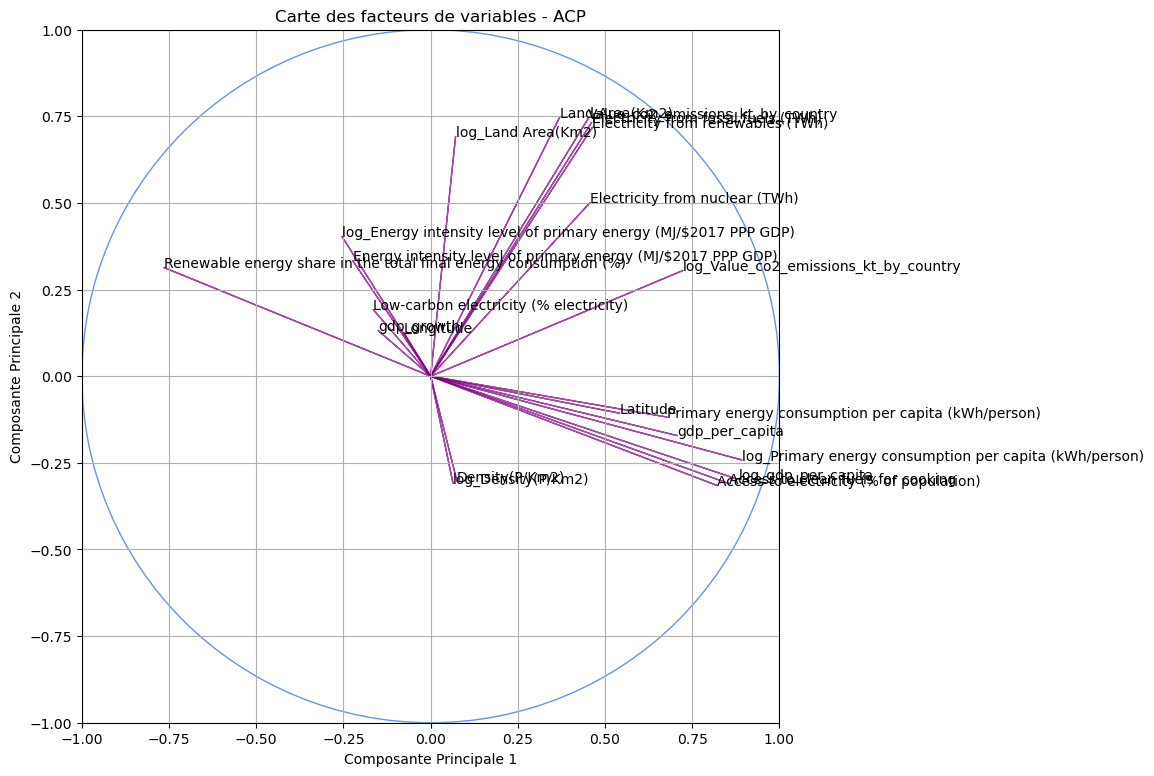

In [21]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, df_norm.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Carte des facteurs de variables - ACP')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

plt.grid(True)
plt.show()

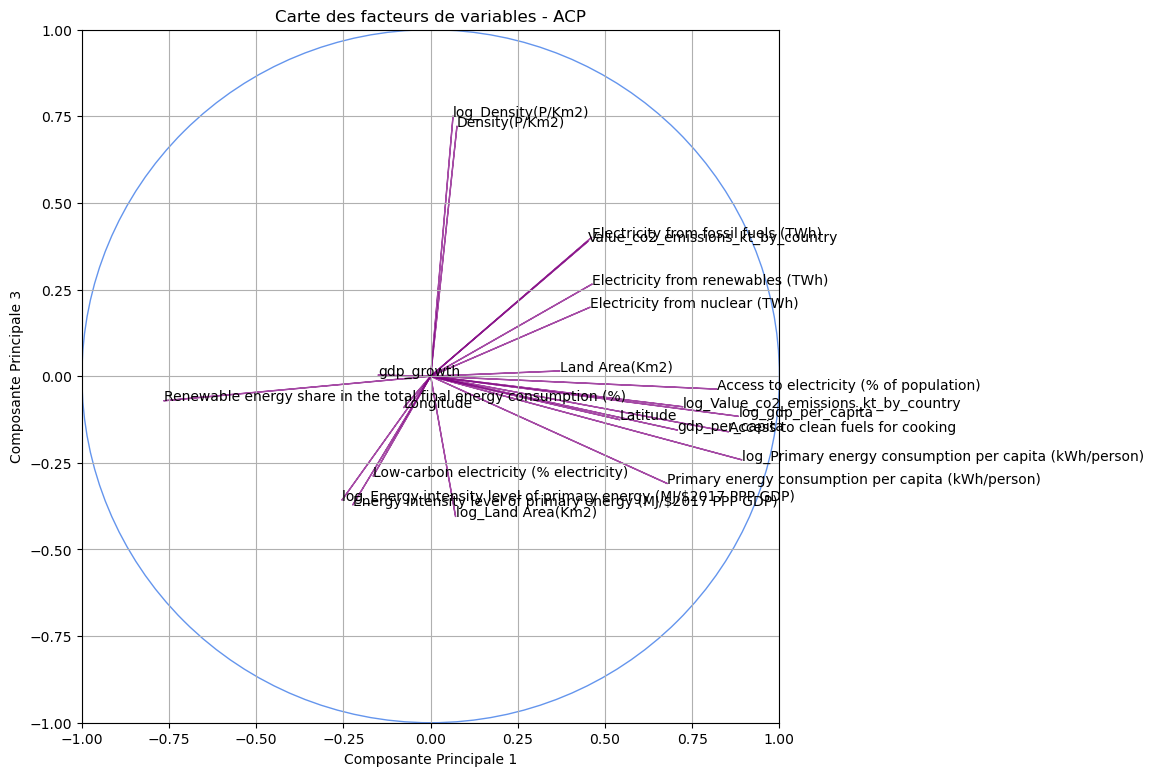

In [22]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, df_norm.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Carte des facteurs de variables - ACP')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 3')

plt.grid(True)
plt.show()

8. Visualisez la possible dépendance entre la variable Year et la variable à prédire.

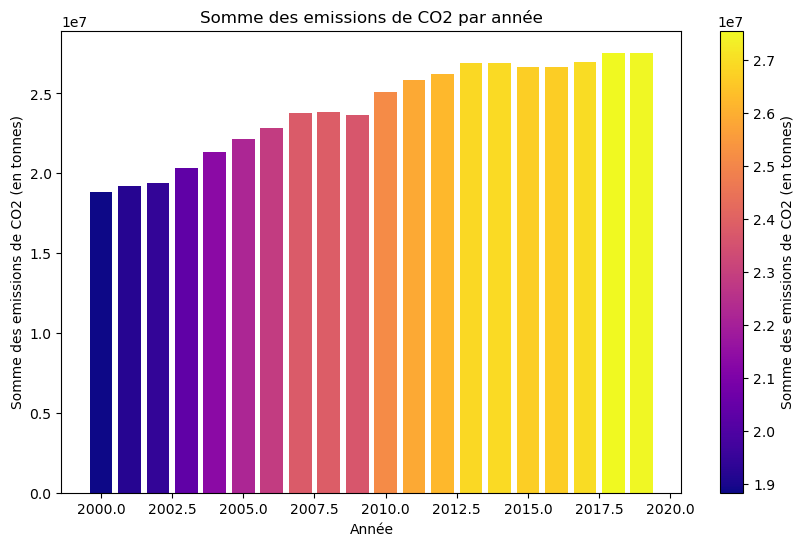

In [23]:
from matplotlib import colormaps
from matplotlib.cm import ScalarMappable

df_somme_annee = df.groupby('Year')['Value_co2_emissions_kt_by_country'].sum().reset_index()

#On enlève la dernière année (2020) car on avait que des na et donc la colonne est restée mais avec aucunes valeurs
df_somme_annee = df_somme_annee.drop(df_somme_annee.index[-1])

cmap = plt.get_cmap('plasma')

# Normalisation des valeurs pour correspondre à la colormap
norm = plt.Normalize(df_somme_annee['Value_co2_emissions_kt_by_country'].min(), df_somme_annee['Value_co2_emissions_kt_by_country'].max())

plt.figure(figsize=(10, 6))
plt.bar(df_somme_annee['Year'],df_somme_annee['Value_co2_emissions_kt_by_country'],color=cmap(norm(df_somme_annee['Value_co2_emissions_kt_by_country'])))
plt.xlabel('Année')
plt.ylabel('Somme des emissions de CO2 (en tonnes)')
plt.title('Somme des emissions de CO2 par année')


# Création de l'objet mappable
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Ajout de l'argument ax pour spécifier les axes
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Somme des emissions de CO2 (en tonnes)')

plt.show()

On remarque que les émissions de CO2 sont corrélées avec l'année observée. En effet, ces dernières semblent malheureusement augmenter avec le temps.

# Modélisation

Nous nous intéressons maintenant à la prediction de la variable quantitative "Value-co2-emissions".

1. Divisez le jeu de données sans données manquantes en un échantillon d’apprentissage et un échantillon test. Vous prendrez un pourcentage de 20% pour l’échantillon test. Pourquoi cette étape est-elle nécessaire lorsque nous nous concentrons sur les performances des algorithmes ?

Cette étape, réalisée ci-dessous, est crutiale pour évaluer les performances des algorithmes car deux jeux de données différents nous permettent d'évaluer différentes erreurs des modèles. Par exemple, le training set, nous servira d'entraînement et permettra d'évaluer l'erreur d'ajustement, tandis que le test set nous permettra de calculer l'erreur de généralisation.

Aussi, nous allons tester nos modèles sur 'Value_co2_emissions_kt_by_country' ainsi que sa transformation logarithmique, ce qui nous demande de créer deux variables y.

Pour finir, la variable 'Electricity from fossil fuels (TWh)' étant très corrélée avec la variable à prédire, nous décidons de la retirer du jeu de données.

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(["Value_co2_emissions_kt_by_country",
             "log_Value_co2_emissions_kt_by_country",
             'Electricity from fossil fuels (TWh)'], axis=1)
y = df['Value_co2_emissions_kt_by_country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

print('Taille des échantillons :')
print('X_train :', len(X_train)) 
print('X_test :', len(X_test)) 
print('y_train :', len(y_train)) 
print('y_test :', len(y_test)) 

Taille des échantillons :
X_train : 2214
X_test : 554
y_train : 2214
y_test : 554


2. Comparez les performances d’un modèle de régression linéaire avec/sans sélection de variables, avec/sans pénalisation, d’un SVM, d’un arbre optimal, d’une forêt aléatoire, du boosting, et de réseaux de neurones. Justifiez vos choix (par exemple le noyau pour le SVM), et ajustez soigneusement les paramètres (par validation croisée). Interprétez les résultats et quantifiez l’amélioration éventuelle apportée par les modèles non linéaires.

2. a) Modèle de régression linéaire sans pénalisation

Pour un modèle de régression linéaire, seules les variables quantitatives interviennent. C'est pour cela que nous décidons de retirer les colonnes 'Entity' et 'Year' du jeu de données.

In [25]:
X_train = X_train.drop(['Entity','Year'],axis=1)
X_test = X_test.drop(['Entity','Year'],axis=1)

On créé un modèle afin de prédire, dans un premier temps, 'Value_co2_emissions_kt_by_country'.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#on réalise un modèle linéaire simple sur nos données d'entrainement 
reg = LinearRegression().fit(X_train, y_train)

#on affiche le score d'ajustement du modèle
print("Score d'ajustement :",reg.score(X_train, y_train))

#on teste le modèle de prédiction sur notre échantillon test
prediction = reg.predict(X_test)

#on affiche l'erreur du modèle entre les valeurs qu'ils prédisent et celles observées.
print("MSE de généralisation :",mean_squared_error(y_test,prediction))

Score d'ajustement : 0.8302889631853281
MSE de généralisation : 125307229786.55562


De la même manière, on créé un modèle pour prédire la transformée logarithmique de 'Value_co2_emissions_kt_by_country'.

In [27]:
#on réalise un modèle linéaire simple sur nos données d'entrainement 
reg = LinearRegression().fit(X_train, log_y_train)

#on affiche le score d'ajustement du modèle
print("Score d'ajustement :",reg.score(X_train, log_y_train))

#on teste le modèle de prédiction sur notre échantillon test
prediction = reg.predict(X_test)

#on affiche l'erreur du modèle entre les valeurs qu'ils prédisent et celles observées.
print("MSE de généralisation :",mean_squared_error(log_y_test,prediction))

Score d'ajustement : 0.9867456216255613
MSE de généralisation : 0.07507549444396301


Etant donné que nous observons un meilleur score d'ajustement lorsque nous prédisons le logarithme de 'Value_co2_emissions_kt_by_country', et que le Mean Square Error (MSE) de généralisation est plus faible donc plus facile à interpréter, nous déciderons par la suite d'uniquement prédire log_y_train et log_y_test.

2. b) Modèle linaire avec pénalisation LASSO 

In [28]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.005,0.01,0.05,0.1,0.3,0.5,1,2,5,10]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, log_y_train)

# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.986057, Meilleur paramètre = {'alpha': 0.005}


In [31]:
## finir les modèles linéaires 

## Support Vector Machine (SVM)

Nous souhaitons étudier la méthodes de la SVM sur nos données. Pour ce faire nous commençons par standardiser nos données.
#Pq?

In [32]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)  

Xr_train = scaler.transform(X_train)  
Xr_test = scaler.transform(X_test)

Nous sommes dans le cas d'une régression, donc on utilise le package SVM.

In [33]:
from sklearn.svm import SVR

Il existe différents noyaux dans la méthode SVM 
=> les détaillés?

Le noyau est défini comme le produit scalaire des entrées projetées dans l'espace complet H de dimension supérieure. Il est de existe plusieurs formes de produits scalaires. 
(je peux mettre des formules de produits scalaires svv)
- le noyau 'linéaire' :
- le noyau 'polynomial' : 
- le noyau 'radial' :

Nous commençons par tester le noyau dit "linéaire". Nous optimisons nos paramètres de tuning par validation croisée. Dans ce premier cas les paramètres de tuning se résument au coefficient de coût que l'on note C.  

In [34]:
"""
#svm_linear = SVR(kernel='linear')  # Utilisation du noyau linéaire
# ou
#svm_poly = SVR(kernel='poly')  # Utilisation du noyau polynomial
# ou
#svm_rbf = SVR(kernel='rbf')  # Utilisation du noyau RBF (par défaut)

# Premier cas : noyau lineaire

#Paramètre tuning de notre algorithme :
param=[{"C":[0.1,1,10]}]

# Optimisation des paramètres par validation croisée
svm = GridSearchCV(SVR(kernel='linear'), param, cv=10, n_jobs=-1)

#Entraînement du modèle avec notre training set et les paramètres optimisés
svmOpt = svm.fit(Xr_train, log_y_train)

# Affichage paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))"""

'\n#svm_linear = SVR(kernel=\'linear\')  # Utilisation du noyau linéaire\n# ou\n#svm_poly = SVR(kernel=\'poly\')  # Utilisation du noyau polynomial\n# ou\n#svm_rbf = SVR(kernel=\'rbf\')  # Utilisation du noyau RBF (par défaut)\n\n# Premier cas : noyau lineaire celui utilisé par défaut \nparam=[{"C":[0.1,1,10]}]\n\nsvm = GridSearchCV(SVR(kernel=\'linear\'), param, cv=10, n_jobs=-1)\n\nsvmOpt = svm.fit(X_train, log_y_train)\n# paramètre optimal\nprint("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))'

In [35]:
# erreur de prévision sur le test
print('erreur sur test set =', 1-svmOpt.score(Xr_test, log_y_test))

#Affichage du MSE. Le MSE est fait sur le test car si on fait sur le train on "triche", il faut tester sur un ensemble qu'il n'a jamais vu
log_y_pred = svmOpt.predict(Xr_test)

print("MSE=",mean_squared_error(log_y_test, log_y_pred))

#Affichage des résidus 
log_y_pred = svmOpt.predict(Xr_train)

residus = log_y_train - log_y_pred

# Graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(log_y_pred, residus)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Graphique des résidus')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.grid(True)
plt.show()

SyntaxError: EOF while scanning triple-quoted string literal (1383777838.py, line 22)

In [ ]:
ANALYSE : 

On teste désormais le noyau polynomial. On optimise également les paramètres de tuning tels que le coût, 'degree', 'gamma', 'coef0'

In [36]:
"""#Deuxieme cas : noyau polynomial 

#Paramètres tuning de notre algorithme :

param=[{"C":[0.1,1,10,100],
        'degree':[3,5,7],
        'gamma':['scale', 'auto'],
        'coef0':[0,0.1,0.5]}]

# Optimisation des paramètres par validation croisée
svm = GridSearchCV(SVR(kernel='poly'), param, cv=10, n_jobs=-1)

#Entraînement du modèle avec notre training set et les paramètres optimisés
svmOpt = svm.fit(Xr_train, log_y_train)

# paramètres optimaux
print("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))"""

'#Deuxieme cas : noyau polynomial \nparam=[{"C":[0.1,1,10,100],\n        \'degree\':[3,5,7],\n        \'gamma\':[\'scale\', \'auto\'],\n        \'coef0\':[0,0.1,0.5]}]\n\nsvm = GridSearchCV(SVR(kernel=\'poly\'), param, cv=10, n_jobs=-1)\n\nsvmOpt = svm.fit(X_train, log_y_train)\n# paramètre optimal\nprint("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))'

In [37]:
"""# erreur de prévision sur le test
print('erreur sur test set =', 1-svmOpt.score(Xr_test, log_y_test))

#Affichage du MSE. Le MSE est fait sur le test car si on fait sur le train on "triche", il faut tester sur un ensemble qu'il n'a jamais vu
log_y_pred = svmOpt.predict(Xr_test)

print("MSE=",mean_squared_error(log_y_test,log_y_pred))

# Affichage des résidus 
log_y_pred = svmOpt.predict(Xr_train)

residus = log_y_train - log_y_pred

# Graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(log_y_pred, residus)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Graphique des résidus')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.grid(True)
plt.show()"""

'# erreur de prévision sur le test\nprint(\'erreur sur test set =\', 1-svmOpt.score(X_test, log_y_test))\n\n#Affichage du MSE. Le MSE est fait sur le test car si on fait sur le train on "triche", il faut tester sur un ensemble qu\'il n\'a jamais vu\nlog_y_pred = svmOpt.predict(X_test)\n\nprint("MSE=",mean_squared_error(log_y_test,log_y_pred))\n\n#Affichage des résidus \nlog_y_pred = svmOpt.predict(X_train)\n\nresidus = log_y_train - log_y_pred\n\n# Tracer un graphique des résidus\nplt.figure(figsize=(10, 6))\nplt.scatter(log_y_pred, residus)\nplt.axhline(y=0, color=\'r\', linestyle=\'--\')\nplt.title(\'Graphique des résidus\')\nplt.xlabel(\'Prédictions\')\nplt.ylabel(\'Résidus\')\nplt.grid(True)\nplt.show()'

ANALYSE :

Enfin, on étudie le noyau "radial", on optimise les paramètres de tuning : le coût, "epsilon","gamma".

In [50]:
"""
#Paramètres tuning de notre algorithme :
param=[{"C":[7,15,30,50,100,500],
        "gamma":['scale','auto'],
        "epsilon":[0.005,0.01,0.1,0.5]}]

# Optimisation des paramètres par validation croisée
svm = GridSearchCV(SVR(), param, cv=10, n_jobs=-1)

svmOpt = svm.fit(Xr_train, log_y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))"""


svm = SVR(C=500, epsilon=0.01, gamma='scale')

#Entraînement du modèle avec notre training set et les paramètres optimisés
svmOpt = svm.fit(Xr_train, log_y_train)


#Meilleur score = 0.988836, Meilleur paramètre = {'C': 500, 'epsilon': 0.01, 'gamma': 'scale'}

On calcule les performances de notre modèle :

erreur sur test set = 1.0413856725994954
MSE= 0.03280464919353475


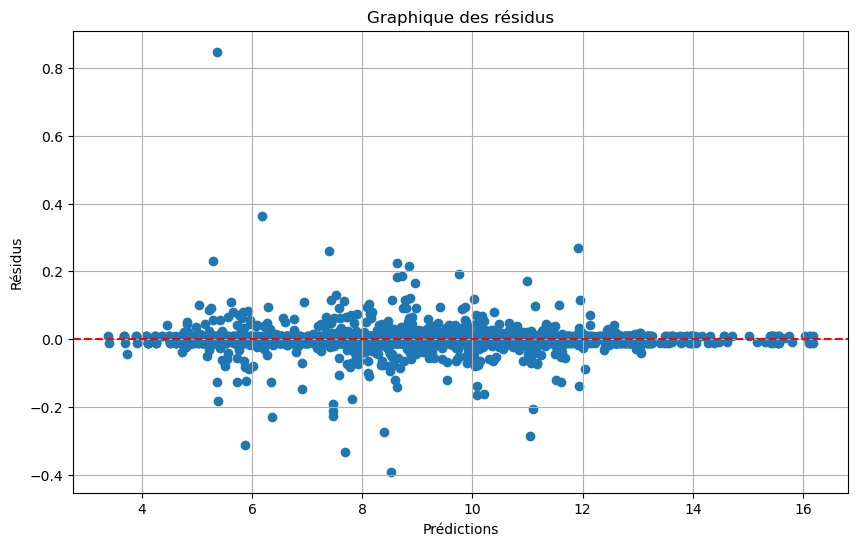

In [51]:
# erreur de prévision sur le test
#print('erreur sur test set =', 1-svmOpt.score(X_test, log_y_test))
print('erreur sur test set =', 1-svmOpt.score(Xr_test, y_test))

#Affichage du MSE. Le MSE est fait sur le test car si on fait sur le train on "triche", il faut tester sur un ensemble qu'il n'a jamais vu
log_y_pred = svmOpt.predict(Xr_test)

print("MSE=",mean_squared_error(log_y_test, log_y_pred))

# Affichage des résidus 
log_y_pred = svmOpt.predict(Xr_train)

residus = log_y_train - log_y_pred

# Graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(log_y_pred, residus)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Graphique des résidus')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.grid(True)
plt.show()


ANALYSE : 
--> très bon résidus (ne pas oublier de prendre l'échantillon standardisé ca change tout ahah)

Normalement :
    Globalement, on obtient de meilleur résultat avec le noyau kernel. De plus on peut ajouter le fait que le temps de calcul pour l'optimisation des paramètres de tuning est beaucoup moins importante pour le kernel radial.

## ARBRE DE REGRESSION


On tente désormais une autre méthode afin de prédire nos valeurs de C02 : l'arbre de régression.
=> on explique un peu le concept ?

Une remarque importante est qu'il ne faut pas standardiser nos données pour cette méthode. Car elle n'est pas sensible aux unités des variables, ne se basant pas sur des notions de distances.

Pour cela, on se sert du package DecisionTreeRegressor car on est dans le cas de la régression. Ici encore on optimise nos paramètres de tuning afin d'avoir le meilleur modèle possible. Cette optimisation se fait ici encore par validation croisée.

Les paramètres à optimiser sont : 
 - 'splitter' : il s'agit de la stratégie utilisée pour choisir la répartition à chaque nœud. Il existe l'option "best" pour choisir la meilleure division et "random" pour choisir la meilleure division aléatoire.
 - 'max_depth': il s'agit de la profondeur maximale de l'arbre.
 - 'min_samples_leaf': c'est le nombre minimum d'échantillons requis pour diviser un noeud interne
 - 'min_weight_fraction_leaf': il s'agit de la fraction pondérée minimale de la somme totale des poids requise pour être à un nœud feuille. 
 - 'max_features' : nombre de caractéristiques à prendre en compte lors de la recherche de la meilleure fente :
 - 'max_leaf_nodes': nombre maximum de noeuds.

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Paramètres tuning de notre algorithme :
param={"splitter":["best","random"],
       "max_depth" : [1,3,5,7,9,11,12],
       "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
       "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
       "max_features":["log2","sqrt",None],
       "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# Optimisation des paramètres par validation croisée
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)

#Entraînement du modèle avec notre training set et les paramètres optimisés
treeOpt=tree.fit(X_train, log_y_train)

# on affiche les meilleurs paramètres qui découlent de la validation croisée

print("Meilleur score = %f, Meilleur paramètre = %s" % (treeOpt.best_score_,treeOpt.best_params_))

# on prédit les valeurs sur l'ensemble de test
predictions = treeOpt.predict(X_test)

# on calcule le score sur l'ensemble de test (par exemple, l'erreur quadratique moyenne)
mse = mean_squared_error(log_y_test, predictions)
print("Erreur quadratique moyenne sur l'ensemble de test:", mse)

#Meilleur score = 0.706866, Meilleur paramètre = {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
#Erreur quadratique moyenne sur l'ensemble de test: 1.7941451998985531

Meilleur score = 0.735377, Meilleur paramètre = {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
Erreur quadratique moyenne sur l'ensemble de test: 1.709346034441776


On affiche les résidus du modèle obtenus par rapport au training set :
=> expliquer ou avoir expliqué + ht la diff residus training et test set

0.24645454158809188 



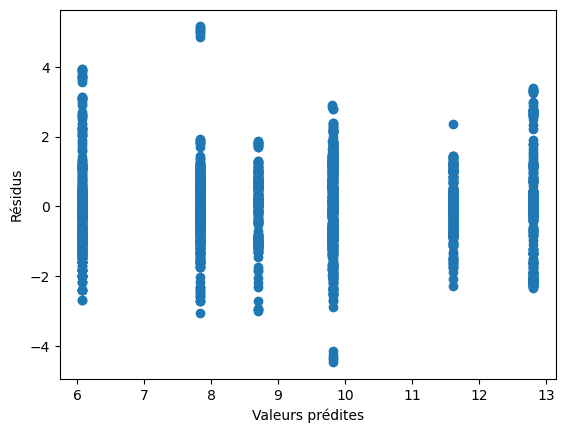

In [55]:
print(1-treeOpt.score(X_train, log_y_train),'\n')

# prévision de l'échantillon test
log_y_chap = treeOpt.predict(X_train)

#Graphe des résidus issus training set
plt.figure()
plt.plot(log_y_chap, log_y_train-log_y_chap,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Résidus")
plt.show()

In [ ]:
ANALYSE : 
- parler de la forme caractéristique des résidus <=> arbre 

On utilise un autre package pour regarder les arbres aléatoire "RandomForestRegressor"

In [ ]:
# il met trop de temps à run donc je le mets en commentaires 

"""from sklearn.ensemble import RandomForestRegressor

# Créer et entraîner le modèle de Random Forest

param=[{"n_estimators" : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]}]
random_forest = GridSearchCV(RandomForestRegressor(criterion='squared_error',bootstrap=True, oob_score=True),param,cv=10)
random_forest.fit(X_train, log_y_train)

###
random_forest = RandomForestRegressor(n_estimators=100)  # Vous pouvez ajuster n_estimators selon vos besoins
random_forest.fit(X_train, y_train) ###

# Prédire les valeurs sur l'ensemble de test
predictions = random_forest.predict(X_test)

# Calculer le score sur l'ensemble de test (par exemple, l'erreur quadratique moyenne)
mse = mean_squared_error(log_y_test, predictions)
print("Erreur quadratique moyenne sur l'ensemble de test:", mse)"""

In [56]:
# prévision de l'échantillon test
y_chap = random_forest.predict(X_train)

plt.figure()
plt.plot(y_chap, log_y_train-y_chap,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Résidus")
plt.show()

NameError: name 'random_forest' is not defined

In [57]:
rfFit=random_forest.fit(X_train, log_y_train)

# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(X_train.columns[indices[f]], importances[indices[f]])
    
# Graphe des importances
plt.figure()
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices]);
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90);
plt.xlim([-1, X_train.shape[1]]);
plt.show()

NameError: name 'random_forest' is not defined

## Boosting 

## Réseaux de neurones 

Enfin, on prédit notre modèle en utilisant l'algorithme des réseaux de neurones. Cette méthode consiste en..

Rmq : ici encore on ne doit pas standardiser nos données car cet algorithme ne fait pas appelle à des notions de distance entre des points.

In [58]:
#on importe le package MLRegressor
from sklearn.neural_network import MLPRegressor

On optimise nos paramètres tuning, qui sont : 
 - 'hidden_layer_sizes': représente le nombre de neurones dans la ième couche cachée.
 - 'activation': permet de choisir la fe ième élément représente le nombre de neurones dans la ième couche cachée.onction d'activation de la couche cachée.

In [ ]:
# Tuning paramètres à tester de notre réseau de neurones
param_grid = [{"hidden_layer_sizes":list([(30,),(100,),(500,),(1000,)]),
               "activation":['identity', 'logistic', 'tanh', 'relu']}] 

#Optimisation des paramètres par validation croisée
nnet = GridSearchCV(MLPRegressor(max_iter=2000),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(X_train, log_y_train)
#nnetOpt=nnet.fit(X_train, y_train)

# Affichage des paramètres optimaux
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Rmq : lors de nos tests d'optimisation des paramètres de tuning nous avons testé la double couche cachée (100,100) mais nous avons trouvé que le réseau de neurones était plus optimisé avec une seule couche cachée contenant 1000 neurones.

In [ ]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(X_test, log_y_test)
1-nnetOpt.score(X_test, y_test)

In [ ]:
# prévision de l'échantillon test
log_y_chap = nnetOpt.predict(X_train)

# Graphe des résidus issus du training set
plt.figure()
plt.plot(y_chap, y_train - log_y_chap,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Résidus")
plt.show()

In [ ]:
ANALYSE :


## Complétion des données manquantes :